In [1]:
import pandas as pd

from causalgraph import Rex
from causalgraph.common.utils import save_experiment, load_experiment
from causalgraph.common.plots import subplots

dataset_name = 'generated_linear_10'
data = pd.read_csv("~/phd/data/generated_linear_10_mini.csv")

rex = load_experiment('rex', "/Users/renero/phd/output/REX")
# rex = Rex().fit(data)
# save_experiment('rex', "/Users/renero/phd/output/REX", rex)


In [2]:
from causalgraph.independence.feature_selection import select_features

target_name = 'V0'
feature_names = rex.shaps.all_feature_names_
method='knee'
sensitivity=1.0
tolerance=0.04
descending=False
strict=True

selected_features = select_features(
    rex.shaps.shap_values[target_name],
    [e for e in feature_names if e != target_name],
    method=method,
    tolerance=tolerance,
    sensitivity=sensitivity,
    descending=descending,
    strict=strict)

print(selected_features)

['V4', 'V9', 'V6', 'V7', 'V3', 'V5', 'V1', 'V8']


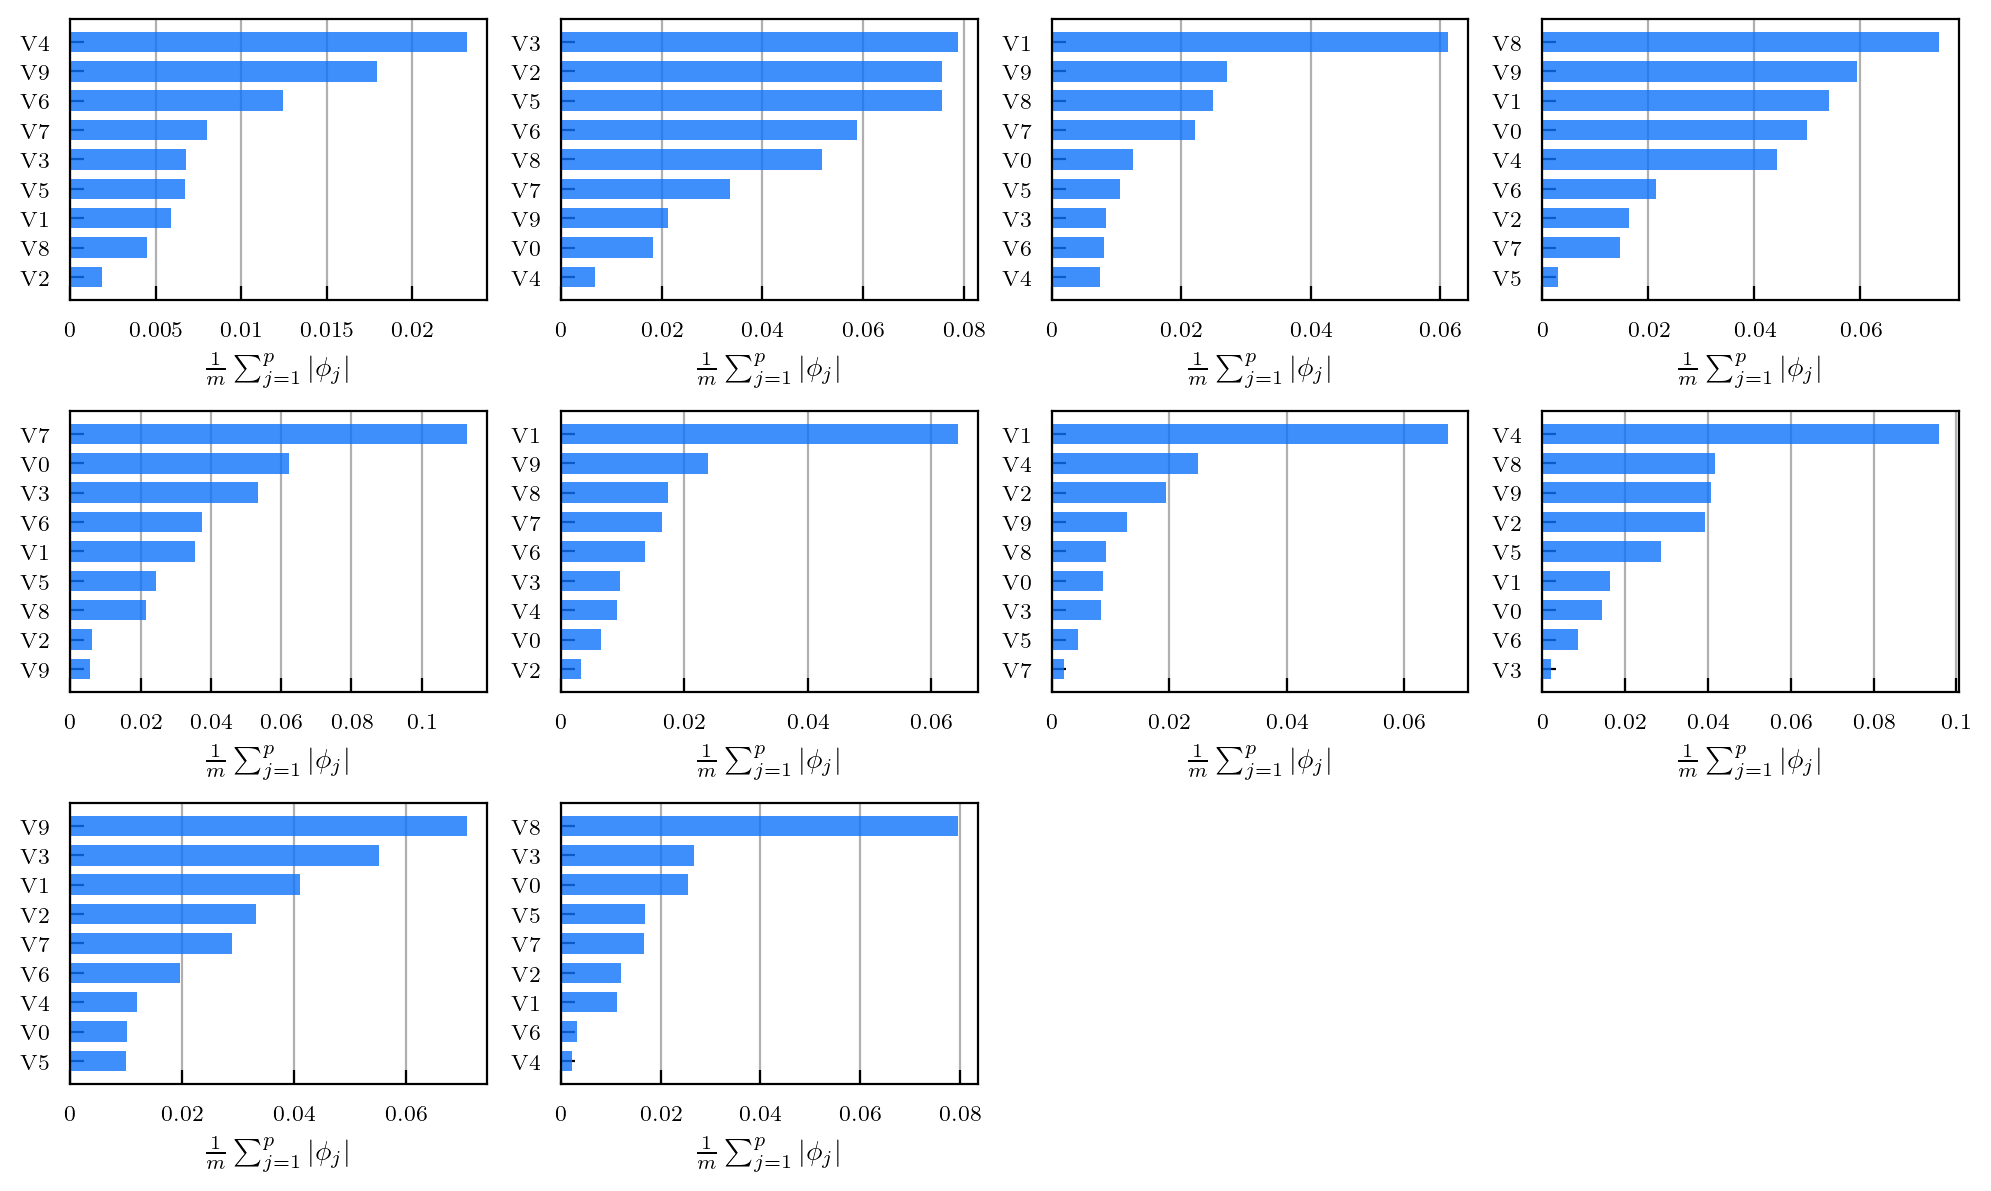

In [4]:
plot_args = [(target_name) for target_name in rex.shaps.all_feature_names_]
subplots(4, rex.shaps.summary_plot, *plot_args, dpi=200);

In [6]:
rex.shaps.parents[target_name]

['V4', 'V9', 'V6', 'V7', 'V3', 'V5', 'V1', 'V8']